### Business Objective/Understanding

#### This analysis is focused on a data obtained from a survey in May-June 2021 in India about the psychological impact of second wave of COVID-19 on the Indian population. Three main questions which we aim to get from our analysis:

- To identify whether Depression, Anxiety or Stress is the most prevelant
- To find out the level of severity of the mental health issues
- To identify which mental health problem is having the most severity across people

A standard questionnaire (DASS 21) was used in the survey which helped in calculating the level of severity of each mental health issue i.e., Anxiety, Depression and Stress (please find its link below)

Survey Link: https://docs.google.com/forms/d/1TwdH5pWl6R_K-rWfscVPHwFUfw6tIS9hS91pQ5lFpxQ/edit

Document for DASS 21 score: https://maic.qld.gov.au/wp-content/uploads/2016/07/DASS-21.pdf

Medium Blog: https://medium.com/@deepanshupandey195/towards-understanding-the-psychological-impact-of-covid-19-on-indian-population-a553932df325

#### Importing Relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Loading Survey Data

In [2]:
survey_data = pd.read_csv("Covid 19 Mental Health Survey.csv")
col_name_df = pd.read_csv("Column Names for Dataframe.csv")

In [3]:
survey_data.head(2) #printing head of data to see the column names; survey questions are column names

,Timestamp,In which State/UT do you currently live?,What is your age?,Please select your gender.,How would you describe your occupation?,How many earning members are there in your immediate family?,What is your annual household income (in rupees ₹)?,How has your overall household income changed during COVID-19?,Do you or your family have any pending loan(s)?,Did you or anyone in your family get infected by COVID-19?,...,"Please read each statement and select number 0, 1, 2 or 3 which indicates how much the statement applied to you over the past 3-4 weeks. (0 being the least; 3 being the most) [I felt I wasn’t worth much as a person]","Please read each statement and select number 0, 1, 2 or 3 which indicates how much the statement applied to you over the past 3-4 weeks. (0 being the least; 3 being the most) [I felt that life was meaningless]","Please read each statement and select number 0, 1, 2 or 3 which indicates how much the statement applied to you over the past 3-4 weeks. (0 being the least; 3 being the most) [I found it hard to take things easily]","Please read each statement and select number 0, 1, 2 or 3 which indicates how much the statement applied to you over the past 3-4 weeks. (0 being the least; 3 being the most) [I tended to over-react to situations]","Please read each statement and select number 0, 1, 2 or 3 which indicates how much the statement applied to you over the past 3-4 weeks. (0 being the least; 3 being the most) [I felt that I was nervous ]","Please read each statement and select number 0, 1, 2 or 3 which indicates how much the statement applied to you over the past 3-4 weeks. (0 being the least; 3 being the most) [I found myself getting agitated]","Please read each statement and select number 0, 1, 2 or 3 which indicates how much the statement applied to you over the past 3-4 weeks. (0 being the least; 3 being the most) [I found it difficult to relax]","Please read each statement and select number 0, 1, 2 or 3 which indicates how much the statement applied to you over the past 3-4 weeks. (0 being the least; 3 being the most) [I was generally intolerant of things]","Please read each statement and select number 0, 1, 2 or 3 which indicates how much the statement applied to you over the past 3-4 weeks. (0 being the least; 3 being the most) [I felt unusually sensitive ]","During the past one month, which of the following have you experienced the most?"
0,2021/05/22 3:11:51 PM GMT+5:30,Delhi,18 - 25 years old,Male,Private Sector Employee,2,10 - 20 lakhs,No change,Yes,Yes,...,1,1,2,2,1,2,2,1,2,"Depression (feeling of sadness, loss of intere..."
1,2021/05/22 3:14:54 PM GMT+5:30,Delhi,18 - 25 years old,Male,Private Sector Employee,3 or more,10 - 20 lakhs,No change,No,No,...,0,1,1,0,1,0,2,1,1,"Anxiety (feeling of worry, nervousness etc.)"


In [4]:
survey_data.columns = list(col_name_df["Column Name "]) 
#Loading column data frame to change survey questions to relevant col names

In [5]:
survey_data.head(2) #column names changed

,Timestamp,State,Age,Gender,Occupation,Earning Members,Household Income,Income Affected,Loan,Covid positive,...,Depression 6,Depression 7,Stress 1,Stress 2,Stress 3,Stress 4,Stress 5,Stress 6,Stress 7,Most Experienced Issue
0,2021/05/22 3:11:51 PM GMT+5:30,Delhi,18 - 25 years old,Male,Private Sector Employee,2,10 - 20 lakhs,No change,Yes,Yes,...,1,1,2,2,1,2,2,1,2,"Depression (feeling of sadness, loss of intere..."
1,2021/05/22 3:14:54 PM GMT+5:30,Delhi,18 - 25 years old,Male,Private Sector Employee,3 or more,10 - 20 lakhs,No change,No,No,...,0,1,1,0,1,0,2,1,1,"Anxiety (feeling of worry, nervousness etc.)"


#### In the survey 21 questions were asked:

- 7 questions were Anxiety related questions
- 7 questions were Depresion related questions
- And 7 questions were Stress related questions

The below rating scale was available as options to the 21 questions asked which is as follows:

- 0: Did not apply to me at all
- 1: Applied to me to some degree, or some of the time
- 2: Applied to me to a considerable degree or a good part of time
- 3: Applied to me very much or most of the time


In [6]:
## creating list of columns with questions related to Anxiety, Depression and Stress
anxiety_cols = []
depression_cols = []
stress_cols = []

for i in range(len(list(survey_data.columns))):
    
    rest1 = re.findall("Anxiety.*", survey_data.columns[i])
    rest2 = re.findall("Depression.*", survey_data.columns[i])
    rest3 = re.findall("Stress.*", survey_data.columns[i])
    
    if len(rest1)>0:
        anxiety_cols.append(rest1[0])
    if len(rest2)>0:
        depression_cols.append(rest2[0])
    if len(rest3)>0:
        stress_cols.append(rest3[0])

- The final score for each of Anxiety, Depression and Stress is obtained by multiplying the total score of each of the category by 2

In [7]:
#Obtaining Final Scores
survey_data["Anxiety"] = 2*survey_data[anxiety_cols].sum(axis=1)
survey_data["Depression"] = 2*survey_data[depression_cols].sum(axis=1)
survey_data["Stress"] = 2*survey_data[stress_cols].sum(axis=1)

In [8]:
##Function to get the most prominent issue from the scoring based on DASS 21
def get_most_prominent(score_a, score_d, score_s):
    
    """Input: Anxiety score,
              Depression score,
              Stress score
              
      Output: Returns the most prominent issue"""
    
    if score_a>score_d and score_a>score_s:
        return "Anxiety"
    elif score_d>score_a and score_d>score_s:
        return "Depression"
    elif score_s>score_a and score_s>score_d:
        return "Stress"
    elif score_a==score_d and score_a>score_s:
        return "Anxiety, Depression"
    elif score_a==score_s and score_a>score_d:
        return "Anxiety, Stress"
    elif score_d==score_s and score_d>score_a:
        return "Depression, Stress"
    elif score_d==score_a==score_s:
        return "Anxiety, Depression, Stress"

#Get the max. score of all the 3 issues    
def get_max_value(score_a, score_d, score_s):
    
    """Input: Anxiety score,
              Depression score,
              Stress score
              
      Output: Returns the max. score"""
    
    return max(score_a, score_d, score_s)

#To get the severity of the issue
def get_severity(score, issue):
    
    """Input: Max. score,
              Most prominent issue(s)
              
      Output: Returns the severity of the issue"""
    
    if issue=="Anxiety" and score<10:
        return "Normal or Mild"
    elif issue=="Anxiety" and score<15:
        return "Moderate"
    elif issue=="Anxiety" and score>15:
        return "Severe"
    
    if issue=="Depression" and score<14:
        return "Normal or Mild"
    elif issue=="Depression" and score<21:
        return "Moderate"
    elif issue=="Depression" and score>21:
        return "Severe"
    
    if issue=="Stress" and score<19:
        return "Normal or Mild"
    if issue=="Stress" and score<26:
        return "Moderate"
    elif issue=="Stress" and score>26:
        return "Severe"
    
    if issue!="Anxiety" and issue!="Depression" and issue!="Stress" and score>21:
        return "Severe"
    elif issue!="Anxiety" and issue!="Depression" and issue!="Stress" and score>21:
        return "Moderate"
    else: 
        return "Normal or Mild"

In [9]:
survey_data["Max. Score"] = survey_data.apply(lambda x: get_max_value(x["Anxiety"], x["Depression"], x["Stress"]),axis=1)
survey_data["Most Prominent Issue"] = survey_data.apply(lambda x: get_most_prominent(x["Anxiety"], x["Depression"], x["Stress"]),axis=1)
survey_data["Severity"] = survey_data.apply(lambda x: get_severity(x["Max. Score"], x["Most Prominent Issue"]),axis=1)

In [10]:
survey_data["Most Prominent Issue"].value_counts()

Stress                         181
Depression                     125
Anxiety                         74
Anxiety, Depression, Stress     47
Depression, Stress              38
Anxiety, Depression             16
Anxiety, Stress                 12
Name: Most Prominent Issue, dtype: int64

In [11]:
survey_data["Most Experienced Issue"].value_counts()

None                                                                                            148
Anxiety (feeling of worry, nervousness etc.)                                                    141
Stress (feeling of being overwhelmed, unable to cope with mental or emotional pressure etc.)    132
Depression (feeling of sadness, loss of interest etc.)                                           72
Name: Most Experienced Issue, dtype: int64

In [12]:
survey_data["Severity"].value_counts()

Normal or Mild    267
Severe            152
Moderate           74
Name: Severity, dtype: int64

In [13]:
severity_count_df = survey_data.groupby(["Most Prominent Issue"])["Severity"].value_counts()
issue_count_df = pd.DataFrame(survey_data.groupby(["Most Experienced Issue"])["Most Prominent Issue"].value_counts())

severity_count_df = pd.DataFrame(severity_count_df).rename(columns={"Severity":"Severity Count"})
issue_count_df = pd.DataFrame(issue_count_df).rename(columns={"Most Prominent Issue":"Issue Count"})

severity_count_df.reset_index(inplace=True)
issue_count_df.reset_index(inplace=True)

In [14]:
severity_count_df.head()

,Most Prominent Issue,Severity,Severity Count
0,Anxiety,Normal or Mild,36
1,Anxiety,Severe,20
2,Anxiety,Moderate,18
3,"Anxiety, Depression",Normal or Mild,9
4,"Anxiety, Depression",Severe,7


### Analysis

#### Question 1: What is most prevelant- Anxiety, Depression or Stress? (or multiple issues)

Answer:

- According to the chart below, we can see that Stress is the most prevelant followed by Depression then Anxiety

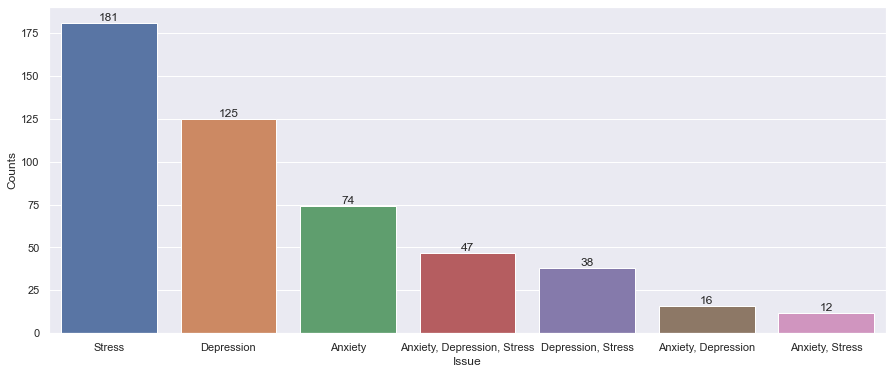

In [15]:
issue_count = pd.DataFrame(survey_data["Most Prominent Issue"].value_counts())
issue_count.reset_index(inplace=True)
issue_count = issue_count.rename(columns={"index": "Issue", "Most Prominent Issue":"Counts"}) 

sns.set(rc={'figure.figsize':(15, 6)})
ax = sns.barplot(x = 'Issue',
            y = "Counts",
            data = issue_count)


for container in ax.containers:
    ax.bar_label(container) 

# Show the plot
plt.show()

#### Question 2: What is the level of severity of mental health problems?

Answer:

- According to the chart below, we can see that almost 30% of the people who took part in the survey were having severe mental health problems

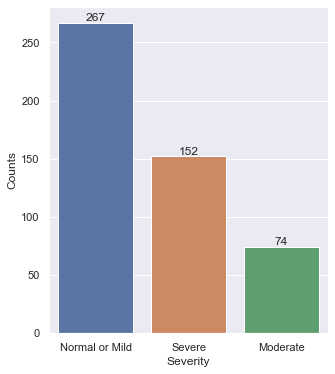

In [16]:
severity_count = pd.DataFrame(survey_data["Severity"].value_counts())
severity_count.reset_index(inplace=True)
severity_count = severity_count.rename(columns={"index": "Severity", "Severity":"Counts"}) 

sns.set(rc={'figure.figsize':(5, 6)})
ax = sns.barplot(x = 'Severity',
            y = "Counts",
            data = severity_count)

for container in ax.containers:
    ax.bar_label(container) 

# Show the plot
plt.show()

#### Question 3: Which mental health issue is having the most severity?

Answer:
- According to the chart below, we can see that Stress and Depression have the most number of "Severe" cases

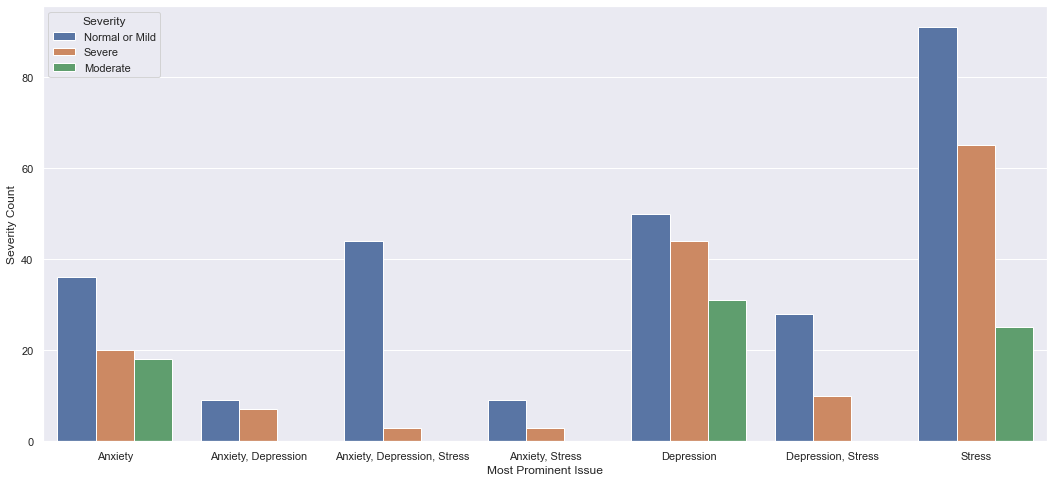

In [17]:
sns.set(rc={'figure.figsize':(18, 8)})
sns.barplot(x = 'Most Prominent Issue',
            y = 'Severity Count',
            hue = 'Severity',
            data = severity_count_df)
 
# Show the plot
plt.show()

### Additional Analysis: Identifying group with "Severe" mental health issues

In [18]:
survey_data_subset = survey_data[survey_data["Severity"]=="Severe"]
survey_data_subset.reset_index(inplace=True, drop=True)

#### 1. Age group

In [19]:
age_count = pd.DataFrame(survey_data_subset["Age"].value_counts())
age_count.reset_index(inplace=True)
age_count = age_count.rename(columns={"index": "Age", "Age":"Counts"}) 
age_count

,Age,Counts
0,18 - 25 years old,105
1,25 - 45 years old,21
2,45+ years old,20
3,16 - 18 years old,5
4,< 16 years old,1


#### 2. According to occupation type

In [20]:
occupation_count = pd.DataFrame(survey_data_subset["Occupation"].value_counts())
occupation_count.reset_index(inplace=True)
occupation_count = occupation_count.rename(columns={"index": "Occupation", "occupation":"Counts"}) 
occupation_count

,Occupation,Occupation
0,Private Sector Employee,69
1,Student,56
2,Unemployed,9
3,Self Employed,9
4,Government Employee,7
5,Homemaker,2


#### 3. According to gender

In [21]:
gender_count = pd.DataFrame(survey_data_subset["Gender"].value_counts())
gender_count.reset_index(inplace=True)
gender_count = gender_count.rename(columns={"index": "Gender", "gender":"Counts"}) 
gender_count

,Gender,Gender
0,Female,78
1,Male,74


#### 4. According to household income

In [22]:
income_count = pd.DataFrame(survey_data_subset["Household Income"].value_counts())
income_count.reset_index(inplace=True)
income_count = income_count.rename(columns={"index": "Income", "income":"Counts"}) 
income_count

,Income,Household Income
0,10 - 20 lakhs,56
1,5 - 10 lakhs,40
2,Less than 5 lakhs,35
3,More than 20 lakhs,21


#### 5. According to change in income

In [23]:
income_change_count = pd.DataFrame(survey_data_subset["Income Affected"].value_counts())
income_change_count.reset_index(inplace=True)
income_change_count = income_change_count.rename(columns={"index": "Income Change", "income_change":"Counts"}) 
income_change_count

,Income Change,Income Affected
0,Decreased slightly,52
1,No change,51
2,Decreased significantly,42
3,Increased slighltly,6
4,Increased significantly,1


##### From the above 5 tables we can see that private sector employees with the age group of 18-25 years old are having the most number of severe cases

Data Modeling was not performed as we were able to answer the questions with the EDA/data analysis